In [ ]:
import numpy as np      
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2, norm, t
import math
import decimal
# Precision to use
decimal.getcontext().prec = 100

In [ ]:
def min_sq(x,y):
 x_bar , y_bar=np.mean(x), np.mean(y)
 beta_1=np.dot(x-x_bar,y-y_bar)/np.linalg.norm(x-x_bar)**2
 beta_0=y_bar-beta_1*x_bar
 return [beta_1,beta_0]

In [ ]:
 N=100
# Data generation
 a=np.random.normal(loc=2,scale=1,size=N) # randomly generate the coefficients of the line
 b= np.random.randn(1) # randomly generate the points surrounding the line
 x= np.random.randn(N)
 y=a*x+b+np.random.randn(N)
 a1,b1=min_sq(x,y) # estimating coefficients
 xx=x-np.mean(x);yy=y-np.mean(y) # centering
 a2,b2=min_sq(xx,yy)
 print(a2)
 print(b2)

2.056365477428022
5.379133118868415e-17


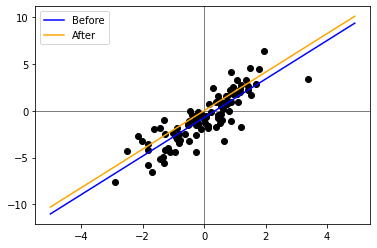

In [ ]:
 x_seq=np.arange(-5,5,0.1)
 y_pre=x_seq*a1+b1
 yy_pre=x_seq*a2+b2
 plt.scatter(x,y,c="black")
# plots of the points
 plt.axhline(y=0,c="black",linewidth=0.5)
 plt.axvline(x=0,c="black",linewidth=0.5)
 plt.plot(x_seq,y_pre,c="blue",label="Before")
# the line before centering
 plt.plot(x_seq,yy_pre,c="orange",label="After") # the line after centering
 plt.legend(loc="upper left")

In [ ]:
## Multi linear regression
n = 100 
p=2
beta=np.array([1,2,3])
x=np.random.randn(n,2)
y=beta[0]+beta[1]*x[:,0]+beta[2]*x[:,1]+np.random.randn(n)
X=np.insert(x,0,1,axis=1) # adding the all one vector in the leftmost column
np.linalg.inv(X.T@X)@X.T@y # estimate the beta

array([0.71916997, 2.21960812, 2.95722656])

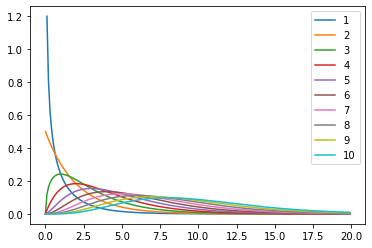

In [ ]:
x=np.arange(0,20,0.1)
for i in range(1,11):
 plt.plot(x,chi2.pdf(x,i),label='{}'.format(i))
plt.legend(loc='upper right')

Text(0.5, 1.0, 'changes of t distribution by degree of freedom')

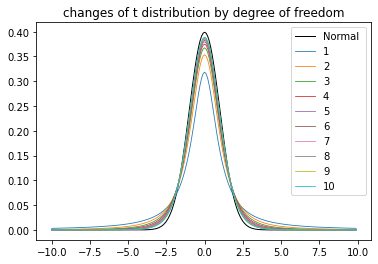

In [ ]:
x=np.arange(-10,10,0.1)
plt.plot(x,norm.pdf(x,0,1),label="Normal ",c="black",linewidth=1)
for i in range(1,11):
 plt.plot(x,t.pdf(x,i),label='{}'.format(i),linewidth=0.8)
plt.legend(loc='upper right')
plt.title("changes of t distribution by degree of freedom")

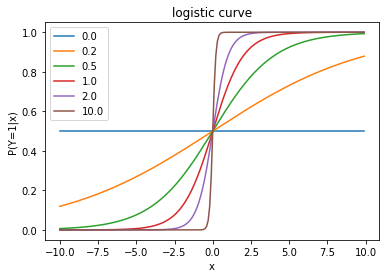

In [ ]:
### Logistic regression
beta_0 = 0
beta_1 = 0.5
def f(x):
 return np.exp(beta_0+beta*x)/(1+np.exp(beta_0+beta*x))

beta_0=0
beta_seq=np.array([0,0.2,0.5,1,2,10])
x_seq=np.arange(-10,10,0.1)
plt.xlabel("x")
plt.ylabel("P(Y=1|x)")
plt.title("logistic curve")
for i in range(beta_seq.shape[0]):
 beta=beta_seq[i]
 p=f(x_seq)
 plt.plot(x_seq,p,label='{}'.format(beta))
plt.legend(loc='upper left')

In [ ]:
### Example of Newton's METHOD
N=1000; p=2
X=np.random.randn(N,p)
X=np.insert(X,0,1,axis=1)
beta=np.random.randn(p+1)
y=[]
prob=1/(1+np.exp(X@beta))
for i in range(N):
 if (np.random.rand(1)>prob[i]):
  y.append(1)
else :
 y.append(-1)
# Data generation ends here
beta # check

# likelihood estimation
#gamma=np.random.randn(p+1) # initial value of beta
#print (gamma)
#while (np.sum((beta-gamma)**2)>0.001):
 #beta=gamma
 #s=X@beta
 #v=math.exp(-s*y)
 #u=(y*v)/(1+v)
 #w=v/((1+v)**2)
 #W=np.diag(w)
 #z=s+u/w
 #gamma=np.linalg.inv(X.T@W@X)@X.T@W@z
 #print (gamma)

array([-1.03610253, -1.11180313,  1.5946772 ])

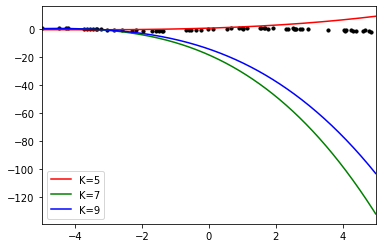

In [ ]:
n=100
x=np.random.randn(n)*2*np.pi
y=np.sin(x)+0.2*np.random.randn(n)
col_set=["red","green","blue"]
K_set=[5,7,9]
plt.scatter(x,y,c="black",s=10)
plt.xlim(-5,5)
for k in range(3):
 K=K_set[k]
 knots=np.linspace(-2*np.pi,2*np.pi,K)
 X=np.zeros((n,K+4))
 for i in range(n):
  X[i,0]=1
  X[i,1]=x[i]
  X[i,2]=x[i]**2
  X[i,3]=x[i]**3
  for j in range(K):
   X[i,j+4]=np.maximum((x[i]-knots[j])**3,0)
 beta=np.linalg.inv(X.T@X)@X.T@y
 def f(x):
   S=beta[0]+beta[1]*x+beta[2]*x**2+beta[3]*x**3
   for j in range(K):
    S=S+beta[j+4]*np.maximum((x-knots[j])**3,0)
    return S
 u_seq=np.arange(-5,5,0.02)
 v_seq=[]
 for u in u_seq:
  v_seq.append(f(u))
 plt.plot(u_seq,v_seq,c=col_set[k],label="K={}".format(K))
 plt.legend()

In [ ]:
### Natural Spline Regression
def d(j,x,knots):
 K=len(knots)
 return (np.maximum((x-knots[j])**3,0)-np.maximum((x-knots[K-1])**3,0))/(knots[K-1]-knots[j])

def h(j,x,knots):
 K=len(knots)
 if j==0:
  return 1
 elif j==1:
  return x
 else :
  return (d(j-2,x,knots)-d(K-2,x,knots)) # Note that the way of counting in array is beginning 0.

n=100
x=np.random.randn(n)*2*np.pi
y=np.sin(x)+0.2*np.random.randn(n)
K=11
knots=np.linspace(-5,5,K)
X=np.zeros((n,K+4))
for i in range(n):
 X[i,0]=1
 X[i,1]=x[i]
 X[i,2]=x[i]**2
 X[i,3]=x[i]**3
 for j in range(K):
  X[i,j+4]=np.maximum((x[i]-knots[j])**3,0)
beta=np.linalg.inv(X.T@X)@X.T@y

def f(x):
 S=beta[0]+beta[1]*x+beta[2]*x**2+beta[3]*x**3
 for j in range(K):
  S=S+beta[j+4]*np.maximum((x-knots[j])**3,0)
 return S


 X=np.zeros((n,K))
 X[:,0]=1
 for j in range(1,K):
  for i in range(n):
   X[i,j]=h(j,x[i],knots)
 gamma=np.linalg.inv(X.T@X)@X.T@y

 def g(x):
  S=gamma[0]
  for j in range(1,K):
    S=S+gamma[j]*h(j,x,knots)
  return S

 u_seq=np.arange(-6,6,0.02)
 v_seq=[]; w_seq=[]
 for u in u_seq:
   v_seq.append(f(u))
   w_seq.append(g(u))
 plt.scatter(x,y,c="black",s=10)
 plt.xlim(-6,6)
 plt.xlabel("x")
 plt.ylabel("f(x),g(x)")
 plt.tick_params(labelleft=False)
 plt.plot(u_seq,v_seq,c="blue",label="spline ")
 plt.plot(u_seq,w_seq,c="red",label=" natural spline")
 plt.vlines(x=[-5,5],ymin=-1.5,ymax=1.5,linewidth=1)
 plt.vlines(x=knots,ymin=-1.5,ymax=1.5,linewidth=0.5,linestyle="dashed")
 plt.legend()

In [ ]:
def sq_loss(y):
 if len(y)==0:
  return 0
 else:
  y_bar=np.mean(y)
 return np.linalg.norm(y-y_bar)**2

In [ ]:
def mode_max(y):
 if len(y)==0:
  return -np.inf
 count=np.bincount(y)
 return np.argmax(count)

In [ ]:
def branch(x,y,S,rf=0):
 if rf==0:
  m=x.shape[1]

 if x.shape[0]==0:
  return([0,0,0,0,0,0,0])
 best_score=np.inf
 for j in range(x.shape[1]):
  for i in S:
    left=[]; right=[]
    for k in S:
      if x[k,j]<x[i,j]:
        left.append(k)
      else:
        right.append(k)
    left_score=f(y[left]); right_score=f(y[right])
    score=left_score+right_score
    if score<best_score:
     best_score=score
     i_1=i; j_1=j
     left_1=left; right_1=right
     left_score_1=left_score; right_score_1=right_score
  return [i_1,j_1,left_1,right_1,best_score,left_score_1,right_score_1]

In [ ]:
class Stack:
  def __init__(self,parent,set,score):
   self.parent=parent
   self.set=set
   self.score=score

In [ ]:
class Node:
  def __init__(self,parent,j,th,set):
   self.parent=parent
   self.j=j
   self.th=th
   self.set=set

In [ ]:
def dt(x,y,alpha=0,n_min=1,rf=0):
 if rf==0:
   m=x.shape[1]
# A single set of stack is constructed. Decision tree is initialized.
 stack=[Stack(0,list(range(x.shape[0])),f(y))] # f is global
 node=[]
 k=-1
# Extracting the last element of the stack and updating the decision tree
 while len(stack)>0:
  popped=stack.pop()
  k=k+1
  i,j,left,right,score,left_score,right_score=branch(x,y,popped.set,rf)
  if popped.score-score<alpha or len(popped.set)<n_min or len(left)==0 or len(right)==0:
   node.append(Node(popped.parent,-1,0,popped.set))
  else:
   node.append(Node(popped.parent,j,x[i,j],popped.set))
   stack.append(Stack(k,right,right_score))
  stack.append(Stack(k,left,left_score))
# After these , set the value of node.left and node.right.
 for h in range(k,-1,-1):
   node[h].left=0; node[h].right=0;
 for h in range(k,0,-1):
   pa=node[h].parent
   if node[pa].right==0:
    node[pa].right=h
   else:
    node[pa].left=h
# After these , calculate the value of node.center
 if f==sq_loss:
  g=np.mean
 else:
  g=mode_max
 for h in range(k+1):
   if node[h].j==-1:
     node[h].center=g(y[node[h].set])
   else:
    node[h].center=0
   return node


In [ ]:
# Mode
def mode(y):
 n=len(y)
 if n==0:
  return 0
 return max(freq(y))

In [ ]:
def freq(y):
 y=list(y)
 return [y.count(i) for i in set(y)]

In [ ]:
# error rate
def mis_match(y):
 return len(y)-mode(y)

# Load Boston Housing Dataset
The Boston housing dataset is a famous dataset from the 1970s. It contains 506 observations on housing prices around Boston. It is often used in regression examples and contains 15 features. Data set for the Boston median housing prices
(Response) and thirteen other covariates (N = 506). For α = 0, n.min = 50, we
construct a decision tree. The procedure is implemented via the following
code

In [ ]:
!pip install sklearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()
iris.target_names
f=mis_match
x=iris.data
y=iris.target
n=len(x)
nodde=dt(x,y,n_min=4)
m=len(node)
u=[]; v=[]
for h in range(m):
 if nodde[h].j==-1:
  w=y[nodde[h].set]
  u.extend([nodde[h].center]*len(w))
  v.extend(w)
table_count(3,np.array(u),np.array(v))

In [ ]:
################################################################ statistical packages
#Import statistical package from Scipy
from scipy import stats
#Import the normal distribution class
from scipy.stats import norm
#Produce 1000 Random Variable following normal distribution
r = norm.rvs(size=1000)
#Plotting the distribution
fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
!pip install pingouin


In [ ]:
#Import necessary package
# anova analyze of variance
#Seaborn is a Python data visualization library based on matplotlib. 
#It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns
import pingouin as pg
mpg = sns.load_dataset('mpg')
pg.anova(data = mpg, dv = 'mpg', between = 'origin')

-tatsmodels.api which provide many Cross-sectional models and methods, including Regression and GLM.

-statsmodels.tsa.api Which provide Time-series models and methods.

-statsmodels.formula.api Which provide an interface for specifying models using formula strings and DataFrames — in simpler term, you could create your own model.

In [ ]:
pip install statsmodels


In [ ]:
#Importing the necessary package

!pip install sklearn

from sklearn.datasets import load_boston
import statsmodels.api as sm
from statsmodels.api import OLS
#import the data
boston = load_boston()
data = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
target = pd.Series(boston['target'])
#Develop the model
sm_lm = OLS(target, sm.add_constant(data))
result = sm_lm.fit()
result.summary()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, s

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          6.72e-135
Time:                        17:12:39   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)


In [ ]:
reg.score(X, y)


1.0

In [ ]:
reg.coef_

array([1., 2.])

In [ ]:
reg.intercept_

3.0000000000000018

In [ ]:
reg.predict(np.array([[3, 5]]))

array([16.])